
# Linear Regression


import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
%matplotlib inline

In this section we will learn how to train, use and estimate the *linear regression*. We will work with 2 datasets
* healthexp - for the simple 1-parameter `X` linear regression
* diamonds - for the more sofisticated models, involving multiple parameter/polynomial regression


## Life Expectancy vs. Spendings

Let's load the data set from the standard set of Seaborn package


In [2]:
# Those who have internet connection can load the data like this:
#df = sns.load_dataset('healthexp')

df = pd.read_csv('./data/healthexp.csv')
df.head(5)

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


The simplest model for such predictions is the linear model
$$
\widehat{y} = ax + b
$$


In [3]:
X = df.loc[df.Country=='Canada', 'Spending_USD'].values.reshape((-1, 1))
y = df.loc[df.Country=='Canada', 'Life_Expectancy'].values
lin_model = linear_model.LinearRegression()
lin_model.fit(X, y)

LinearRegression()

Let's look at the plots

Text(0.5, 1.0, 'Country: Canada')

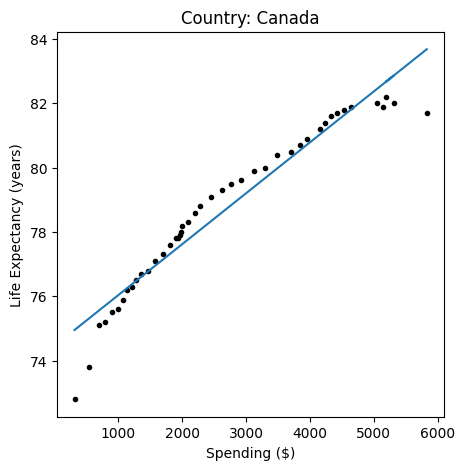

In [4]:
plt.figure(figsize=(5, 5))
plt.plot(X, y, '.k')
plt.plot(X, lin_model.predict(X))
plt.xlabel('Spending ($)')
plt.ylabel('Life Expectancy (years)')
plt.title('Country: Canada')

#### predict

We can easily get the parameters of the model in the following way:

In [5]:
print('The parameters of the model y=ax+b are')
print(f'a={lin_model.coef_[0]}')
print(f'b={lin_model.intercept_}')

The parameters of the model y=ax+b are
a=0.0015828050279988568
b=74.45575471973685


How we can use the model? Suppose that given the data we want to estimate how much will be the Life expectancy for the Spendings of $1000$? The answer is we plug $x=1000$ into the model that we trained on the data and get the predicted answer

In [6]:
def get_prediction(model, x):
    return model.coef_[0] * x + model.intercept_

print(f'The Life expectancy for x=1000 is {lin_model.predict([[1000]])}')
print(f'The Life expectancy for x=100000 is {lin_model.predict([[100000]])}')

The Life expectancy for x=1000 is [76.03855975]
The Life expectancy for x=100000 is [232.73625752]


For $1000$ the prediction is good. However, the model predicts that for $20000$, Life expectancy will be 139 years (!) - it's improssible. What is the exaplnation? The answer is: extrapolation is very dangerous


#### MSE

In [7]:
from sklearn import metrics

y_pred = lin_model.predict(X)

print(f'MSE={np.round(metrics.mean_squared_error(y, y_pred), 3)}')


MSE=0.416


implementation of the function *mse* 
$$
MSE = \frac{1}{n} \sum_{i=1}^n{(y-\widehat{y})^2}
$$

In [8]:
def mse(y_original, y_predicted):
    # Your code goes here
    return 0

print(metrics.mean_squared_error(y, y_pred) - mse(y, y_pred))

0.41555451352034783


#### R^2

In [9]:
print("R^2: {:.4f}".format(lin_model.score(X, y)))

R^2: 0.9321


## Polynomial regression

We would like to extend our simple model to quadritic model
$$
y = a x^2 + b x + c
$$

In order to use polynomial regression of order 2, we just add the square of the *Spendings* feature to our original table. We will use the following syntax of Pandas to do it
```
df['Spending_USD_Square'] = df['Spending_USD']**2
```

In [10]:
df['Spending_USD_Square'] = df['Spending_USD']**2
X2 = df.loc[df.Country=='Canada', ['Spending_USD', 'Spending_USD_Square']].values
y = df.loc[df.Country=='Canada', 'Life_Expectancy'].values
lin_model = linear_model.LinearRegression()
lin_model.fit(X2, y)

LinearRegression()

#### calculate r^2

In [11]:
print("R^2: {:.4f}".format(lin_model.score(X2, y)))

R^2: 0.9921


#### adjusted $R^2$
the adjusted $R^2$ is calculated according to
$$
\hat{R}^2 = 1 - (1 - R^2) \frac{n-1}{n-p-1},
$$
where $n$ - is the number of samples, and $p$ is the number of independent variables. Let's calculate it from the usual $R^2$:

In [12]:
def adjusted_r_square(model, X, y):
    coefficient = (X.shape[0]-1) / (X.shape[0]-X.shape[1]-1)
    return (1 - (1-model.score(X, y)) * coefficient)

print(f'Adjusted R^2={adjusted_r_square(lin_model, X2, y)}')

Adjusted R^2=0.9917539081280502


#### predict

Implement the function *predict_model*, that given the model and the variable returns the predicted Life expectancy
Please, note that we printed the correct predicted values that your function should return

Why the expected value for the $x=15000$ less than for $x=1000$?

In [13]:
def predict_model(model, x):
    # Your code goes here
    return 0

print(f'For x=1000, the model predicts {predict_model(lin_model, 1000)}')
print(f'For x=5000, the model predicts {predict_model(lin_model, 5000)}')
print(f'For x=15000, the model predicts {predict_model(lin_model, 15000)}')

For x=1000, the model predicts 0
For x=5000, the model predicts 0
For x=15000, the model predicts 0


Let's see what about other metrics

Text(0.5, 1.0, 'Country: Canada')

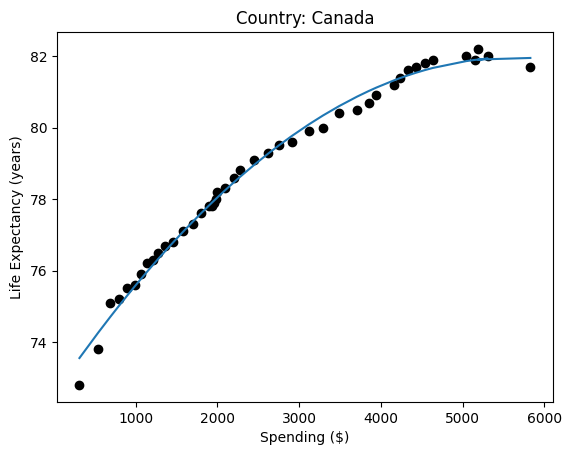

In [14]:
y_pred = lin_model.predict(X2)

plt.scatter(X2[:, 0], y, c= 'k')
plt.plot(X2[:, 0], lin_model.predict(X2))
plt.xlabel('Spending ($)')
plt.ylabel('Life Expectancy (years)')
plt.title('Country: Canada')